# 2024 Presidential Debate Analysis

## Dependencies

In [4]:
import pandas as pd
import numpy as np
import language_tool_python
from PIL import Image
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, SnowballStemmer
# from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nene0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
debate = pd.read_csv(r"C:\Users\nene0\Desktop\Projects\presidential_debate_2024\presidential_debate_2024.csv")

debate.head()

,Topic,Kamala Harris,Donald Trump
0,Economy,"So, I was raised as a middle-class kid. And I ...","First of all, I have no sales tax. That’s an i..."
1,Abortion,"Well, as I said, you’re going to hear a bunch ...","Well, the reason I’m doing that vote is becaus..."
2,Immigration and Border Security,So I’m the only person on this stage who has p...,"Well, I would like to respond. First let me re..."
3,Weaponization of Justice Department,Well let’s talk about extreme. And understand ...,This is the one that weaponized. Not me. She w...
4,Policy Position Changes,So my values have not changed. And I’m going t...,"Well, first of all, I wasn’t given $400 millio..."


In [6]:
debate['KH_Length'] = debate['Kamala Harris'].apply(len)
debate['DT_Length'] = debate['Donald Trump'].apply(len)

In [7]:
debate['Length_Compare'] = debate['KH_Length'] > debate['DT_Length']

In [8]:
# debate['Length_Compare'] = debate['Length_Compare'].map(lambda)

In [9]:
debate['KH_Length'].sum(), debate['DT_Length'].sum()

(32846, 43217)

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
debate['Kamala Harris'][0]

'So, I was raised as a middle-class kid. And I am actually the only person on this stage who has a plan that is about lifting up the middle class and working people of America. I believe in the ambition, the aspirations, the dreams of the American people. And that is why I imagine and have actually a plan to build what I call an opportunity economy. Because here’s the thing. We know that we have a shortage of homes and housing, and the cost of housing is too expensive for far too many people. We know that young families need support to raise their children. And I intend on extending a tax cut for those families of $6,000, which is the largest child tax credit that we have given in a long time. So that those young families can afford to buy a crib, buy a car seat, buy clothes for their children. My passion, one of them, is small businesses. I was actually — my mother raised my sister and me but there was a woman who helped raise us. We call her our second mother. She was a small busines

In [12]:
sid.polarity_scores(debate['Kamala Harris'][0])

{'neg': 0.095, 'neu': 0.786, 'pos': 0.119, 'compound': 0.9685}

In [13]:
def get_negative_sentiment(text):
    return sid.polarity_scores(text)['neg']

def get_positive_sentiment(text):
    return sid.polarity_scores(text)['pos']

def get_neutral_sentiment(text):
    return sid.polarity_scores(text)['neu']

In [14]:
debate['KH_neg'] = debate['Kamala Harris'].apply(get_negative_sentiment)
debate['KH_pos'] = debate['Kamala Harris'].apply(get_positive_sentiment)
debate['KH_neu'] = debate['Kamala Harris'].apply(get_neutral_sentiment)

In [15]:
debate['DT_neg'] = debate['Donald Trump'].apply(get_negative_sentiment)
debate['DT_pos'] = debate['Donald Trump'].apply(get_positive_sentiment)
debate['DT_neu'] = debate['Donald Trump'].apply(get_neutral_sentiment)

In [16]:
print(f"Kamala Harris's Overall Negative Sentiment in debate: {round(debate['KH_neg'].mean(), 4)}\nDonald Trump's Overall Negative Sentiment in debate: {round(debate['DT_neg'].mean(), 4)}")
print(f"Kamala Harris's Overall Positive Sentiment in debate: {round(debate['KH_pos'].mean(), 4)}\nDonald Trump's Overall Positive Sentiment in debate: {round(debate['DT_pos'].mean(), 4)}")
print(f"Kamala Harris's Overall Neutral Sentiment in debate: {round(debate['KH_neu'].mean(), 4)}\nDonald Trump's Overall Neutral Sentiment in debate: {round(debate['DT_neu'].mean(), 4)}")

Kamala Harris's Overall Negative Sentiment in debate: 0.0758
Donald Trump's Overall Negative Sentiment in debate: 0.1236
Kamala Harris's Overall Positive Sentiment in debate: 0.1401
Donald Trump's Overall Positive Sentiment in debate: 0.0873
Kamala Harris's Overall Neutral Sentiment in debate: 0.784
Donald Trump's Overall Neutral Sentiment in debate: 0.7891


In [56]:
sentiment_df = pd.DataFrame({'Kamala Harris':[round(debate['KH_neg'].mean(), 4),
                               round(debate['KH_pos'].mean(), 4),
                               round(debate['KH_neu'].mean(), 4)],
            'Donald Trump':[round(debate['DT_neg'].mean(), 4),
                            round(debate['DT_pos'].mean(), 4),
                            round(debate['DT_neu'].mean(), 4)]},
                            index=['negative', 'positive', 'neutral'])

sentiment_df

,Kamala Harris,Donald Trump
negative,0.0758,0.1236
positive,0.1401,0.0873
neutral,0.7840,0.7891


In [65]:
topic_df = pd.DataFrame({'Kamala Harris': [debate[debate['KH_neg'] == debate['KH_neg'].max()]['Topic'].values,
                                debate[debate['KH_pos'] == debate['KH_pos'].max()]['Topic'].values],
            'Donald Trump': [debate[debate['DT_neg'] == debate['DT_neg'].max()]['Topic'].values,
                             debate[debate['DT_pos'] == debate['DT_pos'].max()]['Topic'].values]},
                             index=['Negative Sentiment Topic', 'Positive Sentiment Topic'])

topic_df

,Kamala Harris,Donald Trump
Negative Sentiment Topic,[Afghanistan],[Israel-Hamas War and Hostages]
Positive Sentiment Topic,[Policy Position Changes],[Economy]


In [21]:
tool = language_tool_python.LanguageToolPublicAPI('en-US')

def count_grammar_errors(text):
    matches = tool.check(text)
    return len(matches)

In [22]:
debate['KH_grammar_error'] = debate['Kamala Harris'].apply(count_grammar_errors)
debate['DT_grammar_error'] = debate['Donald Trump'].apply(count_grammar_errors)

In [23]:
debate.head()

,Topic,Kamala Harris,Donald Trump,KH_Length,DT_Length,Length_Compare,KH_neg,KH_pos,KH_neu,DT_neg,DT_pos,DT_neu,KH_grammar_error,DT_grammar_error
0,Economy,"So, I was raised as a middle-class kid. And I ...","First of all, I have no sales tax. That’s an i...",4859,6374,False,0.095,0.119,0.786,0.086,0.115,0.800,6,17
1,Abortion,"Well, as I said, you’re going to hear a bunch ...","Well, the reason I’m doing that vote is becaus...",3169,5568,False,0.071,0.111,0.818,0.050,0.103,0.847,4,13
2,Immigration and Border Security,So I’m the only person on this stage who has p...,"Well, I would like to respond. First let me re...",4121,5648,False,0.112,0.109,0.778,0.178,0.089,0.733,7,10
3,Weaponization of Justice Department,Well let’s talk about extreme. And understand ...,This is the one that weaponized. Not me. She w...,789,295,True,0.097,0.124,0.779,0.180,0.000,0.820,2,0
4,Policy Position Changes,So my values have not changed. And I’m going t...,"Well, first of all, I wasn’t given $400 millio...",2077,2365,False,0.052,0.202,0.746,0.104,0.101,0.795,2,3


In [24]:
debate.describe()

,KH_Length,DT_Length,KH_neg,KH_pos,KH_neu,DT_neg,DT_pos,DT_neu,KH_grammar_error,DT_grammar_error
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2346.142857,3086.928571,0.075786,0.140143,0.784000,0.123571,0.087286,0.789071,3.142857,6.571429
std,1172.416561,1825.130278,0.038459,0.036384,0.047525,0.046802,0.030101,0.048015,2.597547,4.894491
min,789.000000,295.000000,0.010000,0.066000,0.718000,0.050000,0.000000,0.722000,0.000000,0.000000
25%,1565.500000,1799.750000,0.052750,0.113000,0.742250,0.092250,0.076250,0.751250,1.250000,3.500000
50%,2198.000000,2509.000000,0.080000,0.144500,0.782500,0.114000,0.095500,0.796500,2.000000,5.500000
75%,2970.500000,4194.500000,0.096750,0.158500,0.821750,0.165000,0.107500,0.827500,5.500000,9.500000
max,4859.000000,6374.000000,0.146000,0.202000,0.861000,0.193000,0.115000,0.867000,7.000000,17.000000


In [25]:
kh = ''.join(debate['Kamala Harris'])
dt = ''.join(debate['Donald Trump'])

In [26]:
token_kh = word_tokenize(kh)
token_dt = word_tokenize(dt)
token_kh

['So',
 ',',
 'I',
 'was',
 'raised',
 'as',
 'a',
 'middle-class',
 'kid',
 '.',
 'And',
 'I',
 'am',
 'actually',
 'the',
 'only',
 'person',
 'on',
 'this',
 'stage',
 'who',
 'has',
 'a',
 'plan',
 'that',
 'is',
 'about',
 'lifting',
 'up',
 'the',
 'middle',
 'class',
 'and',
 'working',
 'people',
 'of',
 'America',
 '.',
 'I',
 'believe',
 'in',
 'the',
 'ambition',
 ',',
 'the',
 'aspirations',
 ',',
 'the',
 'dreams',
 'of',
 'the',
 'American',
 'people',
 '.',
 'And',
 'that',
 'is',
 'why',
 'I',
 'imagine',
 'and',
 'have',
 'actually',
 'a',
 'plan',
 'to',
 'build',
 'what',
 'I',
 'call',
 'an',
 'opportunity',
 'economy',
 '.',
 'Because',
 'here',
 '’',
 's',
 'the',
 'thing',
 '.',
 'We',
 'know',
 'that',
 'we',
 'have',
 'a',
 'shortage',
 'of',
 'homes',
 'and',
 'housing',
 ',',
 'and',
 'the',
 'cost',
 'of',
 'housing',
 'is',
 'too',
 'expensive',
 'for',
 'far',
 'too',
 'many',
 'people',
 '.',
 'We',
 'know',
 'that',
 'young',
 'families',
 'need',
 'supp

In [27]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
symbols = ["'", ',', '.', '?', '!', '/', '-', '@', '#', '$', '%', '^', '&', '*', '(', ')', '[', ']', '{', '}', '_', '+', '=', ';', ':', '~', '`', '<', '>', '|', '’',
           '“', '”', '—']

In [29]:
def remove_stop_words(list_words):
    new_text = []
    for word in list_words:
        if word.lower() not in stop_words and word.lower() not in symbols:
            new_text.append(word)
    return new_text

In [30]:
kh_response = remove_stop_words(token_kh)
dt_response = remove_stop_words(token_dt)

In [31]:
kh_response

['raised',
 'middle-class',
 'kid',
 'actually',
 'person',
 'stage',
 'plan',
 'lifting',
 'middle',
 'class',
 'working',
 'people',
 'America',
 'believe',
 'ambition',
 'aspirations',
 'dreams',
 'American',
 'people',
 'imagine',
 'actually',
 'plan',
 'build',
 'call',
 'opportunity',
 'economy',
 'thing',
 'know',
 'shortage',
 'homes',
 'housing',
 'cost',
 'housing',
 'expensive',
 'far',
 'many',
 'people',
 'know',
 'young',
 'families',
 'need',
 'support',
 'raise',
 'children',
 'intend',
 'extending',
 'tax',
 'cut',
 'families',
 '6,000',
 'largest',
 'child',
 'tax',
 'credit',
 'given',
 'long',
 'time',
 'young',
 'families',
 'afford',
 'buy',
 'crib',
 'buy',
 'car',
 'seat',
 'buy',
 'clothes',
 'children',
 'passion',
 'one',
 'small',
 'businesses',
 'actually',
 'mother',
 'raised',
 'sister',
 'woman',
 'helped',
 'raise',
 'us',
 'call',
 'second',
 'mother',
 'small',
 'business',
 'owner',
 'love',
 'small',
 'businesses',
 'plan',
 'give',
 '50,000',
 'tax

In [32]:
len(' '.join(kh_response))

20000

In [33]:
len(' '.join(dt_response))

22841

In [34]:
kh_words = pd.DataFrame(kh_response, columns=['words'])
# kh_words['words'] = kh_words['words'].str.title()

In [35]:
dt_words = pd.DataFrame(dt_response, columns=['words'])

In [36]:
kh_words['words'].value_counts()[:20]

words
people        49
president     44
Trump         38
would         32
Donald        31
American      26
said          25
United        21
States        20
know          20
one           20
plan          20
us            17
America       17
actually      17
going         17
former        16
want          15
understand    14
time          13
Name: count, dtype: int64

In [37]:
dt_words['words'].value_counts()[:20]

words
people       76
going        64
country      55
said         45
get          40
one          32
know         32
like         31
would        30
got          29
never        25
years        25
president    23
go           23
done         21
back         21
good         20
come         19
even         19
things       18
Name: count, dtype: int64

In [38]:
kh_tag = nltk.pos_tag(kh_response)
kh_tag

[('raised', 'VBN'),
 ('middle-class', 'NN'),
 ('kid', 'NN'),
 ('actually', 'RB'),
 ('person', 'NN'),
 ('stage', 'NN'),
 ('plan', 'NN'),
 ('lifting', 'VBG'),
 ('middle', 'JJ'),
 ('class', 'NN'),
 ('working', 'VBG'),
 ('people', 'NNS'),
 ('America', 'NNP'),
 ('believe', 'VBP'),
 ('ambition', 'NN'),
 ('aspirations', 'NNS'),
 ('dreams', 'VBP'),
 ('American', 'JJ'),
 ('people', 'NNS'),
 ('imagine', 'VBP'),
 ('actually', 'RB'),
 ('plan', 'VBP'),
 ('build', 'VB'),
 ('call', 'JJ'),
 ('opportunity', 'NN'),
 ('economy', 'NN'),
 ('thing', 'NN'),
 ('know', 'JJ'),
 ('shortage', 'NN'),
 ('homes', 'NNS'),
 ('housing', 'NN'),
 ('cost', 'NN'),
 ('housing', 'NN'),
 ('expensive', 'JJ'),
 ('far', 'RB'),
 ('many', 'JJ'),
 ('people', 'NNS'),
 ('know', 'VBP'),
 ('young', 'JJ'),
 ('families', 'NNS'),
 ('need', 'VBP'),
 ('support', 'NN'),
 ('raise', 'VB'),
 ('children', 'NNS'),
 ('intend', 'VBP'),
 ('extending', 'VBG'),
 ('tax', 'NN'),
 ('cut', 'NN'),
 ('families', 'NNS'),
 ('6,000', 'CD'),
 ('largest', 'JJS')

In [39]:
dt_tag = nltk.pos_tag(dt_response)
dt_tag

[('First', 'NNP'),
 ('sales', 'NNS'),
 ('tax', 'NN'),
 ('incorrect', 'JJ'),
 ('statement', 'NN'),
 ('knows', 'VBZ'),
 ('tariffs', 'NNS'),
 ('countries', 'NNS'),
 ('countries', 'NNS'),
 ('going', 'VBG'),
 ('finally', 'RB'),
 ('75', 'CD'),
 ('years', 'NNS'),
 ('pay', 'VBP'),
 ('us', 'PRP'),
 ('back', 'RB'),
 ('done', 'VBN'),
 ('world', 'NN'),
 ('tariff', 'NN'),
 ('substantial', 'JJ'),
 ('cases', 'NNS'),
 ('took', 'VBD'),
 ('billions', 'NNS'),
 ('billions', 'NNS'),
 ('dollars', 'NNS'),
 ('know', 'VBP'),
 ('China', 'NNP'),
 ('fact', 'NN'),
 ('never', 'RB'),
 ('took', 'VBD'),
 ('tariff', 'NN'),
 ('much', 'JJ'),
 ('money', 'NN'),
 ('would', 'MD'),
 ('totally', 'RB'),
 ('destroy', 'VB'),
 ('everything', 'NN'),
 ('set', 'NN'),
 ('taken', 'VBN'),
 ('billions', 'NNS'),
 ('dollars', 'NNS'),
 ('China', 'NNP'),
 ('places', 'NNS'),
 ('left', 'VBD'),
 ('tariffs', 'NNS'),
 ('tariffs', 'NNS'),
 ('yet', 'RB'),
 ('inflation', 'NN'),
 ('Look', 'NNP'),
 ('terrible', 'JJ'),
 ('economy', 'NN'),
 ('inflation'

In [40]:
pos_counts = {}

for word, tag in dt_tag:
    if tag in pos_counts:
        pos_counts[tag] += 1
    else:
        pos_counts[tag] = 1

In [41]:
harris_pos = pd.DataFrame(pos_counts, index=['KH_Count_of_POS']).T
harris_pos.sort_values(by='KH_Count_of_POS', ascending=False)

,KH_Count_of_POS
NN,854
JJ,420
NNS,382
NNP,351
VBD,249
RB,228
VBG,187
VBP,174
CD,141
VBN,120


In [42]:
trump_pos = pd.DataFrame(pos_counts, index=['DT_Count_of_POS']).T
trump_pos.sort_values(by='DT_Count_of_POS', ascending=False)

,DT_Count_of_POS
NN,854
JJ,420
NNS,382
NNP,351
VBD,249
RB,228
VBG,187
VBP,174
CD,141
VBN,120


In [43]:
harris_noun = list(filter(lambda x: x[1]=='NNP' or x[1]=='NNPS' or x[1]=='NN' or x[1]=='NNS', kh_tag))
harris_verb = list(filter(lambda x: x[1]=='VBD' or x[1]=='VBG' or x[1]=='VBP' or x[1]=='VBN' or x[1]=='VB' or x[1]=='VBZ', kh_tag))
harris_noun

[('middle-class', 'NN'),
 ('kid', 'NN'),
 ('person', 'NN'),
 ('stage', 'NN'),
 ('plan', 'NN'),
 ('class', 'NN'),
 ('people', 'NNS'),
 ('America', 'NNP'),
 ('ambition', 'NN'),
 ('aspirations', 'NNS'),
 ('people', 'NNS'),
 ('opportunity', 'NN'),
 ('economy', 'NN'),
 ('thing', 'NN'),
 ('shortage', 'NN'),
 ('homes', 'NNS'),
 ('housing', 'NN'),
 ('cost', 'NN'),
 ('housing', 'NN'),
 ('people', 'NNS'),
 ('families', 'NNS'),
 ('support', 'NN'),
 ('children', 'NNS'),
 ('tax', 'NN'),
 ('cut', 'NN'),
 ('families', 'NNS'),
 ('child', 'NN'),
 ('tax', 'NN'),
 ('credit', 'NN'),
 ('time', 'NN'),
 ('families', 'NNS'),
 ('buy', 'NN'),
 ('car', 'NN'),
 ('seat', 'NN'),
 ('buy', 'NN'),
 ('clothes', 'NNS'),
 ('children', 'NNS'),
 ('businesses', 'NNS'),
 ('sister', 'NN'),
 ('woman', 'NN'),
 ('mother', 'NN'),
 ('business', 'NN'),
 ('owner', 'NN'),
 ('businesses', 'NNS'),
 ('tax', 'NN'),
 ('deduction', 'NN'),
 ('businesses', 'NNS'),
 ('part', 'NN'),
 ('backbone', 'NN'),
 ('America', 'NNP'),
 ('economy', 'NN'),

In [44]:
kh_noun_text = ' '.join([word[0] for word in harris_noun])
kh_verb_text = ' '.join([word[0] for word in harris_verb])
kh_noun_text

'middle-class kid person stage plan class people America ambition aspirations people opportunity economy thing shortage homes housing cost housing people families support children tax cut families child tax credit time families buy car seat buy clothes children businesses sister woman mother business owner businesses tax deduction businesses part backbone America economy opponent hand plan tax cut corporations America deficit opponent plan Trump sales tax tax goods month Economists Trump sales tax families year policies middle-class people tax cuts Well Let Donald Trump Donald Trump unemployment Great Depression Donald Trump health century Donald Trump attack democracy Civil War Donald Trump mess build aspirations people debate tonight playbook bunch grievances tonight plan Project president people president understands importance president Americans Donald Trump plan plan tax people opportunity economy economists country world plans America Goldman Sachs Donald Trump plan economy Mine

In [45]:
trump_noun = list(filter(lambda x: x[1]=='NNP' or x[1]=='NNPS' or x[1]=='NN' or x[1]=='NNS', dt_tag))
trump_verb = list(filter(lambda x: x[1]=='VBD' or x[1]=='VBG' or x[1]=='VBP' or x[1]=='VBN' or x[1]=='VB' or x[1]=='VBZ', dt_tag))
trump_noun

[('First', 'NNP'),
 ('sales', 'NNS'),
 ('tax', 'NN'),
 ('statement', 'NN'),
 ('tariffs', 'NNS'),
 ('countries', 'NNS'),
 ('countries', 'NNS'),
 ('years', 'NNS'),
 ('world', 'NN'),
 ('tariff', 'NN'),
 ('cases', 'NNS'),
 ('billions', 'NNS'),
 ('billions', 'NNS'),
 ('dollars', 'NNS'),
 ('China', 'NNP'),
 ('fact', 'NN'),
 ('tariff', 'NN'),
 ('money', 'NN'),
 ('everything', 'NN'),
 ('set', 'NN'),
 ('billions', 'NNS'),
 ('dollars', 'NNS'),
 ('China', 'NNP'),
 ('places', 'NNS'),
 ('tariffs', 'NNS'),
 ('tariffs', 'NNS'),
 ('inflation', 'NN'),
 ('Look', 'NNP'),
 ('economy', 'NN'),
 ('inflation', 'NN'),
 ('country', 'NN'),
 ('buster', 'NN'),
 ('breaks', 'NNS'),
 ('countries', 'NNS'),
 ('inflation', 'NN'),
 ('people', 'NNS'),
 ('Probably', 'NNP'),
 ('nation', 'NN'),
 ('history', 'NN'),
 ('things', 'NNS'),
 ('years', 'NNS'),
 ('disaster', 'NN'),
 ('people', 'NNS'),
 ('class', 'NN'),
 ('class', 'NN'),
 ('millions', 'NNS'),
 ('people', 'NNS'),
 ('country', 'NN'),
 ('prisons', 'NNS'),
 ('institutions

In [46]:
dt_noun_text = ' '.join([word[0] for word in trump_noun])
dt_verb_text = ' '.join([word[0] for word in trump_verb])
dt_noun_text

'First sales tax statement tariffs countries countries years world tariff cases billions billions dollars China fact tariff money everything set billions dollars China places tariffs tariffs inflation Look economy inflation country buster breaks countries inflation people Probably nation history things years disaster people class class millions people country prisons institutions asylums jobs Americans Hispanics Unions towns United States Springfield Ohio look Aurora Colorado towns buildings people Biden let country country level criminality economies history country Number nothing know anyone nothing Project read group people ideas difference nothing everybody book Everybody Cut taxes economy economy pandemic people anything job country economy stock market Nobody anything ventilators world gowns things nobody people credit credit lot things credit job jobs jobs jobs bounce benefit everybody Look Wharton School Finance professors professors plan plan plan plan value country people cre

In [47]:
donkey_mask = np.array(Image.open(r"C:\Users\nene0\Downloads\mask\donkey.jpg"))

In [48]:
elephant_mask = np.array(Image.open(r"C:\Users\nene0\Downloads\mask\elephant.jpg"))

In [72]:
def generate_better_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=100,
                      colormap='seismic',
                      mask=mask,
                      background_color='gray',
                      collocations=False).generate_from_text(data)
    plt.figure(figsize=(8,6))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

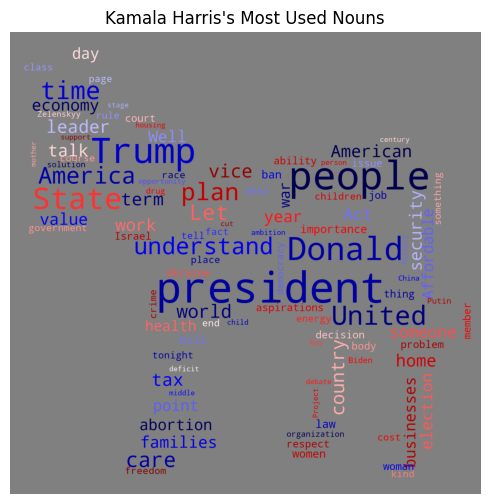

In [76]:
generate_better_wordcloud(kh_noun_text, "Kamala Harris's Most Used Nouns", mask=donkey_mask)

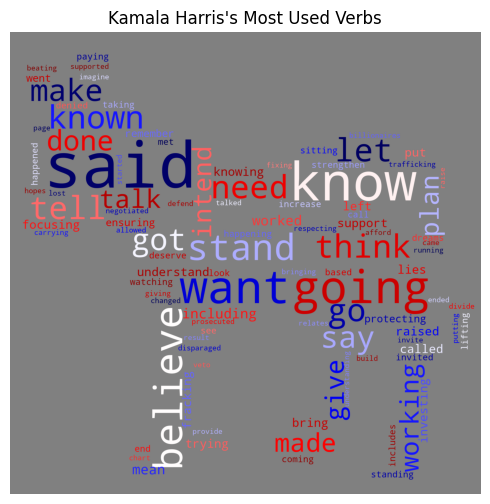

In [91]:
generate_better_wordcloud(kh_verb_text, "Kamala Harris's Most Used Verbs", mask=donkey_mask)

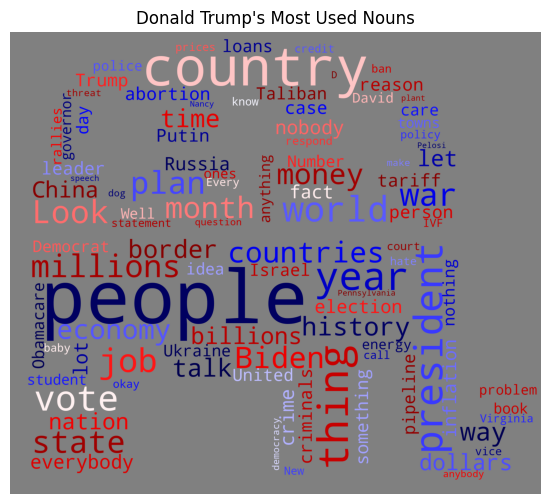

In [97]:
generate_better_wordcloud(dt_noun_text, "Donald Trump's Most Used Nouns", mask=elephant_mask)

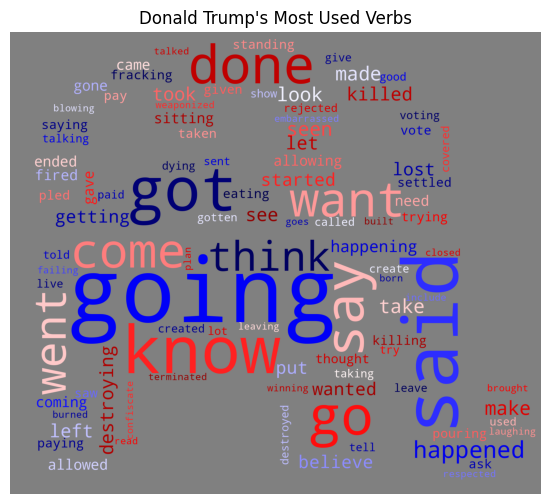

In [101]:
generate_better_wordcloud(dt_verb_text, "Donald Trump's Most Used Verbs", mask=elephant_mask)